<a href="https://colab.research.google.com/github/anishmahapatra/LendingClubLoan-Classification/blob/main/LendingClubLoan_Classification_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling, Visualization, Modelling - Classification: Lending Club Loan Dataset

*Date: 27th March, 2020 <br/>
Author: AM, PQ* 

Welcome to this Collaboratory Notebook. We shall use this notebook to the Fundamentals of the Modelling process. Remember, the best way to learn Data Science is to simply <b>do it.</b> Crack your fingers, it's going to be a fun notebook. 

<b>Aim:</b> <br/>The purpose of this notebook is to analyze, sample, visualize and model (classification) [Lending Club Loan Dataset](https://www.kaggle.com/wordsforthewise/lending-club).

The Lending Club Dataset has been pulled from the LendingClub Website. The level of the Data is at a <b>Customer Id</b> Level.



<a name="0"></a>
## Table of Contents

1 [Loading the Data](#1) <br/>
2 [Sampling the LendingClub Data](#2) <br/>
3 [Feature Selection](#3) <br/>
4 [Pre-processing & Visualization](#4) <br/>
5 [Modelling](#5) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1 [Level-1: Classification Models: LR, KNN, RF, DT, XGB](#5.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2 [Level-2: Hyperparameter Tuning - GridSearch & its variants](#5.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3 [Level-3: Auto ML - PyCaret](#5.3) <br/>
6 [Interpretable Models: SHAP](#6) <br/>
7 [MLflow](#7) <br/>



<a name="1"></a>
## 1 Loading the Data
Back to [Table of Contents](#0)

---


If you would like to pull data from Kaggle into your Google Drive, you can follow this link on [Medium](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a).

You can find our sample notebook to do the same [here](https://colab.research.google.com/drive/1kesXgwQJAxswzuP4CnPP88VUmBuwYPBj).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import os

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)                        #adjust display options

%matplotlib inline 

In [2]:
# Mounting Personal Google Drive onto 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [5]:
# Setting the filepath for the Kaggle Folder in my Google Drive
filepath = '/content/gdrive/My Drive/Kaggle/'

In [6]:
# Storing the files in a list in the variable folders
folders = os.listdir(filepath)
folders = [f for f in folders if 'xlsx' not in f]
folders

['kaggle.json', 'accepted_2007_to_2018q4.csv', 'rejected_2007_to_2018q4.csv']

In [7]:
folders.pop(0)

'kaggle.json'

In [8]:
acc_folder = filepath + [f for f in folders if 'accepted' in f][0]
accepted_fn = acc_folder + '/' + os.listdir(acc_folder)[0]

rej_folder = filepath + [f for f in folders if 'rejected' in f][0]
rejected_fn = rej_folder + '/' + os.listdir(rej_folder)[0]

accepted_fn

'/content/gdrive/My Drive/Kaggle/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'

In [9]:
if os.path.isfile(accepted_fn) and os.path.isfile(rejected_fn):
    print('Correct, you got it right!')
else:
    print('Incorrect, Try again!')

Correct, you got it right!


In [10]:
# Takes a while to read, because these files are large...give it a minute or so
accDf = pd.read_csv(accepted_fn)

# this is a dataset with rejected loans from lendingclub
rejDf = pd.read_csv(rejected_fn)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# this is how we can see how many entries are in the dataframe (df)
# it also works for numpy arrays
accDf.shape

(2260701, 151)

In [12]:
# Viewing the shape of the rejected dataframe
rejDf.shape

(27648741, 9)

FICO Score: The fico score is used to represent the credit worthoness of an individual. it ranges from 300 to 850. A higher fico score is an indication of a higher credit worthiness.

Below, we shall undertsand if the fico score is present in accepted and rejected datasets. 

In [13]:
[col for col in accDf.columns if 'fico' in col.lower()]

['fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high']

In [14]:
# No fico score in rejected loans
[col for col in rejDf.columns if 'fico' in col.lower()]

[]

In [15]:
accDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [16]:
rejDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [17]:
# this is how many rows pandas will show by default with methods like pd.dataframe.head()
pd.options.display.max_rows     # This has been set by is where the packages have been defined

1000

In [18]:
# the .T is transposing the matrix.
# We do this so the 111 column dataframe is easier to read (easier to scroll down than sideways) 
# .head() shows the first few rows of the data
accDf.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [19]:
rejDf.head().T

,0,1,2,3,4
Amount Requested,1000,1000,11000,6000,1500
Application Date,2007-05-26,2007-05-26,2007-05-27,2007-05-27,2007-05-27
Loan Title,Wedding Covered but No Honeymoon,Consolidating Debt,Want to consolidate my debt,waksman,mdrigo
Risk_Score,693,703,715,698,509
Debt-To-Income Ratio,10%,10%,10%,38.64%,9.43%
Zip Code,481xx,010xx,212xx,017xx,209xx
State,NM,MA,MD,MA,MD
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0,0,0,0,0


In [20]:
# shows some common summary statistics
# again, transposing with .T to make it easier to read
accDf.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.000000e+00,8000.0000,12800.000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092829,4.832138,5.310000e+00,9.4900,12.620,15.990000,3.099000e+01
installment,2260668.0,445.806823,267.173535,4.930000e+00,251.6500,377.990,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000,93000.000000,1.100000e+08
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840,24.490000,9.990000e+02
delinq_2yrs,2260639.0,0.306879,0.867230,0.000000e+00,0.0000,0.000,0.000000,5.800000e+01
fico_range_low,2260668.0,698.588205,33.010376,6.100000e+02,675.0000,690.000,715.000000,8.450000e+02


In [21]:
accDf[accDf['int_rate'] > 20]['int_rate'].mean()
# thats a bit of a complicated statement.  Breaking it down:
# acc_df['int_rate'] > 20 returns a mask: an array of True/False values
# putting this array into acc_df[] returns the dataframe rows where the interest rates are greater than 20

# so this first part: acc_df[acc_df['int_rate'] > 20]
# gives us a dataframe

# we select a column with ['int_rate'] at the end.  Then we get the average value with .mean()

23.781285536770067

**Finding unique values**

Numpy has a function for finding the unique values in an array:

np.unique(array)

This is built into pandas:

accDf['grade'].unique()

shows us the unique values in that column.

In [22]:
accDf['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G', nan], dtype=object)

In [23]:
# selecting only grade A loans:
accDf[accDf['grade'] == 'A'].describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,433027.0,14603.343210,9107.975657,500.00,8000.000000,12000.000000,20000.000,4.000000e+04
funded_amnt,433027.0,14598.002723,9108.870617,500.00,8000.000000,12000.000000,20000.000,4.000000e+04
funded_amnt_inv,433027.0,14587.744268,9111.341398,0.00,8000.000000,12000.000000,20000.000,4.000000e+04
int_rate,433027.0,7.084545,0.984465,5.31,6.460000,7.240000,7.890,9.630000e+00
installment,433027.0,437.846530,271.348733,14.77,240.170000,368.720000,602.560,1.268460e+03
annual_inc,433023.0,89902.403133,90257.586254,0.00,53000.000000,75000.000000,106000.000,9.573072e+06
dti,432738.0,16.238648,12.098994,0.00,10.030000,15.240000,21.240,9.990000e+02
delinq_2yrs,433016.0,0.173167,0.606964,0.00,0.000000,0.000000,0.000,5.800000e+01
fico_range_low,433027.0,728.992326,37.114492,660.00,700.000000,725.000000,755.000,8.450000e+02


In [24]:
# Finding unique values of loan status
accDf['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [25]:
# looking at only defaulted loans:
defaultCategories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
# .isin() is a trick for checking if something is in a list
# it's a pandas-specific function
accDf[accDf['loan_status'].isin(defaultCategories)].describe().T
# check out the average interest rate and dti (debt-to-income)

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,269360.0,15547.816955,8814.732243,5.000000e+02,9000.0000,14300.0000,20400.0000,4.000000e+04
funded_amnt,269360.0,15539.056560,8811.315479,5.000000e+02,9000.0000,14250.0000,20400.0000,4.000000e+04
funded_amnt_inv,269360.0,15503.604643,8822.389433,0.000000e+00,8975.0000,14125.0000,20275.0000,4.000000e+04
int_rate,269360.0,15.707638,4.906016,5.310000e+00,12.2900,15.0500,18.5500,3.099000e+01
installment,269360.0,464.692098,262.793280,1.591000e+01,275.0700,402.5400,604.6575,1.717630e+03
annual_inc,269360.0,70398.832450,65385.214622,0.000000e+00,43000.0000,60000.0000,85000.0000,9.500000e+06
dti,269289.0,20.154296,11.825032,0.000000e+00,13.5400,19.7500,26.2900,9.990000e+02
delinq_2yrs,269357.0,0.351463,0.937305,0.000000e+00,0.0000,0.0000,0.0000,2.700000e+01
fico_range_low,269360.0,687.831360,25.955851,6.150000e+02,670.0000,680.0000,700.0000,8.450000e+02


[dti](https://www.investopedia.com/terms/d/dti.asp) is the debt to income ratio. 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


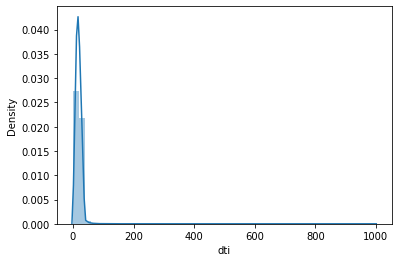

In [26]:
# The docs are here for this function: http://seaborn.pydata.org/generated/seaborn.distplot.html
# Found by Googling 'seaborn histogram'
# Need to drop missing values, otherwise throws an error
# It would be better to impute missing values.
f = sns.distplot(accDf['dti'].dropna())

In [27]:
# adapted from http://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
# we're using interquartile range to determine outliers
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    """
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles
    """
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    iqr = qhigh - qlow
    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


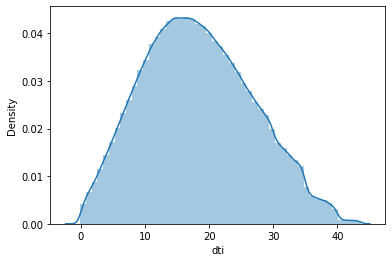

In [28]:
dti_no_outliers = reject_outliers(accDf['dti'], iq_range=0.85) # arrived at 0.85 via trial and error
f = sns.distplot(dti_no_outliers)
# other types of plot examples:
# http://seaborn.pydata.org/examples/

[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Current'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'In Grace Period'),
 Text(0, 0, 'Late (31-120 days)'),
 Text(0, 0, 'Late (16-30 days)'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off')]

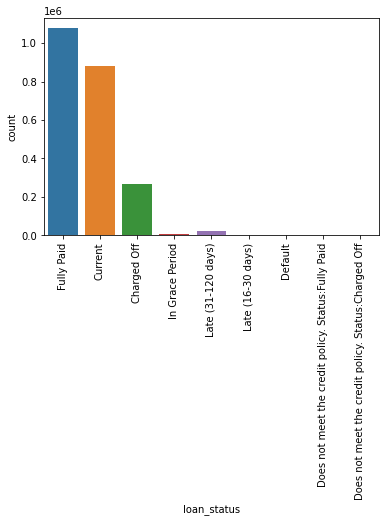

In [29]:
ax = sns.countplot(x=accDf['loan_status'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Now that we have gone through the data, we would like to get the essence of the dataset. It would be ideal if we could have higher computational power to be able to run through the entire dataset. This can be done via elastic cloud architectures via Google Cloud Platform (AI Platform), Azure (Databricks) or Amazon Web Service - aws (Ec2 instance).

For the purpose of illustration in this notebook, we will focus on the following:
1. Reduce the number of rows by sampling
2. Reduce the number of columns/features by Feature selection

For our use-case, we will use the subset of the data to be able to assess whether the customer is likely to pay back the loan or not.

In [30]:
accDf['loan_status'].shape

(2260701,)

In [35]:
# Subsetting values
accDf.loc[(accDf['loan_status'] == 'Fully Paid') | (accDf['loan_status'] == 'Charged Off')].shape

(1345310, 151)

In [38]:
loanDf = accDf.loc[(accDf['loan_status'] == 'Fully Paid') | (accDf['loan_status'] == 'Charged Off')].copy(deep=True)

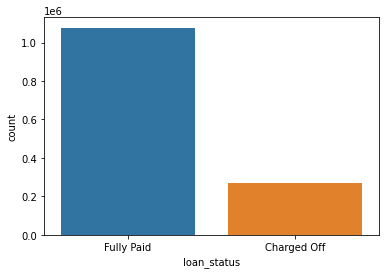

In [41]:
ax = sns.countplot(x=loanDf['loan_status'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

We have now made a base dataset that we can use for classification. The data is stored in loanDf with the consition being that the 'loan_status' column is either *Fully Paid* or *Charged Off*

This results in 1,345,310 rows (about 1.3 million) as compared to the previous 2.2 million odd rows.

We will now proceed with the rest of the step with this subset of the data. Feel free to go back the [Table of Contents](#0) to look at the next steps at a glance.  

<a name="2"></a>
## 2 Sampling the LendingClub Data
Back to [Table of Contents](#0)

---


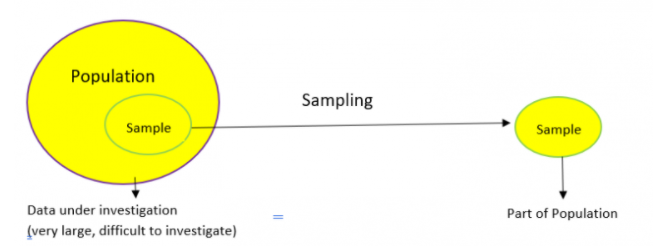

Sampling is a method that allows us to get information about the population based on the statistics from a subset of the population (sample), without having to investigate every individual. [Source](https://www.analyticsvidhya.com/blog/2019/09/data-scientists-guide-8-types-of-sampling-techniques/)

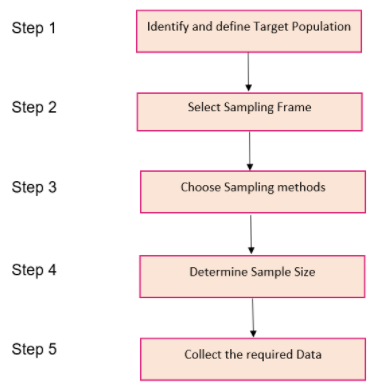

Step-By Step Process on how sampling is carried out.

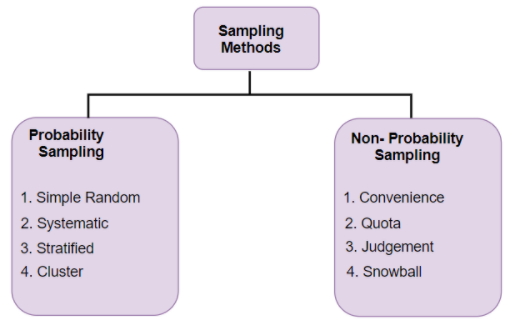

Visual representation of the types of sampling. Please feel free to explore the code and to understand how each of these is carried out.

Here's another reference for sampling (with Code!) [Reference](https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c)

<a name="2.1"></a>
### 2.1 Simple Sampling 
Back to [Table of Contents](#0)

Subset of the population (the entire loanDf dataset) in which each member of the population has an equal probablilty of being chosen.

In [43]:
sampleLoanDf = loanDf.sample(100)
sampleLoanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1123292,36241636,NaN,4200.0,4200.0,4200.0,36 months,14.31,144.18,C,C4,Manager and Engineer,10+ years,MORTGAGE,143000.0,Verified,Dec-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,vacation,Vacation,300xx,GA,18.52,0.0,May-1989,685.0,689.0,1.0,35.0,NaN,11.0,0.0,18387.0,88.8,41.0,w,0.0,0.0,4563.180000,4563.18,4200.0,363.18,0.0,0.0,0.0,Aug-2015,3560.60,NaN,Mar-2019,684.0,680.0,0.0,35.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,480016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20700.0,NaN,NaN,NaN,11.0,43638.0,558.0,96.8,0.0,0.0,158.0,307.0,7.0,6.0,3.0,7.0,66.0,4.0,66.0,4.0,4.0,6.0,4.0,13.0,22.0,6.0,16.0,6.0,11.0,0.0,0.0,0.0,6.0,90.0,75.0,0.0,0.0,505123.0,58757.0,17700.0,53638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
895338,111407616,NaN,8400.0,8400.0,8400.0,36 months,7.21,260.18,A,A3,HOSTESS,8 years,MORTGAGE,60000.0,Not Verified,Jun-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,478xx,IN,16.04,0.0,Mar-1976,750.0,754.0,0.0,48.0,NaN,12.0,0.0,6627.0,17.4,28.0,w,0.0,0.0,8873.755797,8873.76,8400.0,473.76,0.0,0.0,0.0,Jul-2018,2958.33,NaN,Mar-2019,734.0,730.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,28340.0,1.0,2.0,2.0,2.0,12.0,21713.0,77.0,2.0,4.0,2445.0,43.0,38100.0,1.0,3.0,1.0,6.0,2576.0,23973.0,21.7,0.0,0.0,154.0,495.0,2.0,2.0,3.0,2.0,NaN,9.0,NaN,0.0,4.0,4.0,6.0,9.0,6.0,10.0,19.0,4.0,12.0,0.0,0.0,0.0,4.0,96.4,16.7,0.0,0.0,66143.0,28340.0,30600.0,28043.0,NaN,NaN,NaN,NaN,NaN,NaN,

<a name="3"></a>
## 3 Feature Selection
Back to [Table of Contents](#0)

---


<a name="4"></a>
## 4 Pre-processing & Visualization 
Back to [Table of Contents](#0)

---


<a name="5"></a>
## 5 Modelling
Back to [Table of Contents](#0)

---


<a name="5.1"></a>
### 5.1 Level-1: Classification Models: LR, KNN, RF, DT, XGB
Back to [Table of Contents](#0)

<a name="5.2"></a>
### 5.2 Level-2: Hyperparameter Tuning - GridSearch & its variants
Back to [Table of Contents](#0)

<a name="5.3"></a>
### 5.3 Level-3: Auto ML - PyCaret
Back to [Table of Contents](#0)

<a name="6"></a>
## 6 Interpretable Models: SHAP
Back to [Table of Contents](#0)

---


<a name="7"></a>
## 7 MLflow 
Back to [Table of Contents](#0)

---
